# Homework 2

### Pengfei Cheng
### Andrew ID: pengfeic

## Problem 1: Reaction Extent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# import packages for Problem 1

### Problem 1A
\begin{equation}
    \mathrm{2NH_3 \to N_2 + 3H_2}
\end{equation}

In [2]:
alpha = np.array ([-2, 1, 3]) # define the stoichiometric vector
print (alpha)

[-2  1  3]


### Problem 1B

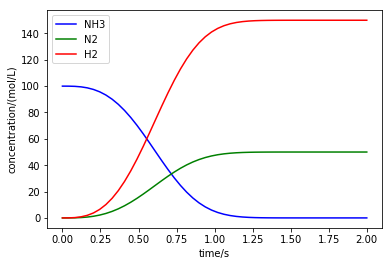

In [3]:
c0 = np.array ([100, 0, 0]) # define the concentration vector

xi_max = 100 / 2; # define the xi_max

def xi(t):
    return (1-np.exp (- 3 * t ** 3)) * xi_max

# define the xi; xi = Xi * xi_max

tspan = np.linspace (0, 2, num = 50)

c = [[None] * 3] * 50 # define the concentration vectors for different t

for i in range (50):
    c[i] = c0 + xi(tspan[i])*alpha

c1, c2, c3 = zip(*c)
    
plt.plot (tspan, c1, 'b-', label='NH3')
plt.plot (tspan, c2, 'g-', label='N2')
plt.plot (tspan, c3, 'r-', label='H2')
plt.xlabel('time/s')
plt.ylabel('concentration/(mol/L)')
plt.legend ()
plt.show()

### Problem 1C

In [4]:
delta = sum(alpha)

def deltaP(t):
    z = 0.5 - delta * xi (t) / 100
    return z

# define the relative pressure change

res, = fsolve (deltaP, 1, full_output=0)

print ('It will take {0:1.4f} s to achieve a 50% higher pressure in the reactor'.format(res)+'.')

It will take 0.6136 s to achieve a 50% higher pressure in the reactor.


## Problem 2: Stoichiometry of reaction systems

In [5]:
import numpy as np

# import packages for Problem 2

### Problem 2A
$\require{mhchem}$
1. $\ce{H2O + CO <=> H_2 + CO2 }$

1.  $\ce{CO_2 <=> C + O_2 }$

1. $\ce{O_2 + 2H_2 <=> 2H_2O}$

1. $\ce{CO + 1/2O2 <=> CO2}$

1. $\ce{C + 2H_2 <=> CH_4}$

1. $\ce{CH4 + 2O2<=> CO2 + 2H2O}$

In [6]:
alpha2 = np.array ([
    [-1, -1, 1, 1, 0, 0, 0],
    [0, 0, 0, -1, 1, 1, 0],
    [2, 0, -2, 0, 0, -1, 0],
    [0, -1, 0, 1, 0, -0.5, 0],
    [0, 0, -2, 0, -1, 0, 1],
    [2, 0, 0, 1, 0, -2, -1]
         ])
print('The stoichiometric vectors for the reactions are\n{}'.format(alpha2)+'.')

The stoichiometric vectors for the reactions are
[[-1.  -1.   1.   1.   0.   0.   0. ]
 [ 0.   0.   0.  -1.   1.   1.   0. ]
 [ 2.   0.  -2.   0.   0.  -1.   0. ]
 [ 0.  -1.   0.   1.   0.  -0.5  0. ]
 [ 0.   0.  -2.   0.  -1.   0.   1. ]
 [ 2.   0.   0.   1.   0.  -2.  -1. ]].


### Problem 2B

In [7]:
M = np.transpose(alpha2)
print('The Matrix M is \n{}'.format(M)+'.')

The Matrix M is 
[[-1.   0.   2.   0.   0.   2. ]
 [-1.   0.   0.  -1.   0.   0. ]
 [ 1.   0.  -2.   0.  -2.   0. ]
 [ 1.  -1.   0.   1.   0.   1. ]
 [ 0.   1.   0.   0.  -1.   0. ]
 [ 0.   1.  -1.  -0.5  0.  -2. ]
 [ 0.   0.   0.   0.   1.  -1. ]].


### Problem 2C

In [8]:
b = np.array([1, 1, 1, 0, 0, -1, -1]).T
x = np.linalg.lstsq(M,b)[0]
print('The reaction extents are {}'.format(x)+'.')

The reaction extents are [-0.42857143 -0.42857143 -0.28571429 -0.57142857 -0.42857143  0.57142857].


### Problem 2D

In [9]:
b2 = np.matmul(M, x)
print('The product of M and x is {}'.format(b2)+'.')
print('Considering the errors are trivial, the numerical solution is right.')

The product of M and x is [  1.00000000e+00   1.00000000e+00   1.00000000e+00  -1.11022302e-16
   6.66133815e-16  -1.00000000e+00  -1.00000000e+00].
Considering the errors are trivial, the numerical solution is right.


### Problem 2E

In [10]:
Mb = np.column_stack((M,b)) # define the augmented matrix

r = np.linalg.matrix_rank(Mb)
print('The rank of the augmented matrix is {}'.format(r)+'.')

The rank of the augmented matrix is 4.


$\mathrm{M} \in \mathbb{R}^{7 \times 6}$, and $r(\mathrm{Mb})=4<6$, so there are infinite solutions to the equations, which means there are infinite ways to arrive the same reaction.

### Problem 2F

In [11]:
alpha3 = np.array([
    [-1, -1, 1, 1, 0, 0, 0],
    [2, 0, -2, 0, 0, -1, 0],
    [2, 0, 0, 1, 0, -2, -1]
         ])
M2 = np.transpose(alpha3)
Mb2 = np.column_stack((M2,b)) # define the new augmented matrix
r2 = np.linalg.matrix_rank(Mb2) 
print('The rank of the new augmented matrix is {}'.format(r2)+'.')

The rank of the new augmented matrix is 3.


$\mathrm{M_2} \in \mathbb{R}^{7 \times 3}$, and $r(\mathrm{Mb}_2)=3$, so there is a unique solution to the equations, which means there is one and only one way to arrive the reaction.

In [12]:
x2 = np.linalg.lstsq(M2,b)[0]
print('The reaction extents are')
print('H2O + CO <=> H2 + CO2\t{:1.1f}'.format(x2[0])+' mol')
print('O2 + 2H2 <=> 2H2O\t\t{:1.1f}'.format(x2[1])+' mol')
print('CH4 + 2O2<=> CO2 + 2H2O\t {:1.1f}'.format(x2[2])+' mol.')

The reaction extents are
H2O + CO <=> H2 + CO2	-1.0 mol
O2 + 2H2 <=> 2H2O		-1.0 mol
CH4 + 2O2<=> CO2 + 2H2O	 1.0 mol.
